In [21]:
import numpy as np
import pandas as pd

In [22]:
import requests

In [23]:
import matplotlib.pyplot as plt


In [24]:
url = 'https://api.hh.ru/vacancies?text=Бухгалтер&per_page=100&only_with_salary=True'
js = requests.get(url).json()['items']
df = pd.DataFrame(js)[['id','name','salary','snippet', 'employer','area']]

In [25]:
df

,id,name,salary,snippet,employer,area
0,85131859,Бухгалтер,"{'from': 1900, 'to': None, 'currency': 'BYR', ...",{'requirement': 'Высшее или среднее специально...,"{'id': '1075075', 'name': 'БЕЛРОБОТ', 'url': '...","{'id': '1002', 'name': 'Минск', 'url': 'https:..."
1,85221542,Бухгалтер на первичную документацию,"{'from': 1700, 'to': None, 'currency': 'BYR', ...",{'requirement': 'Профильное образование. Знани...,"{'id': '3347390', 'name': 'АТС СаниБел', 'url'...","{'id': '1002', 'name': 'Минск', 'url': 'https:..."
2,85248763,Бухгалтер на первичную документацию,"{'from': 1500, 'to': 2500, 'currency': 'BYR', ...","{'requirement': 'Профильное образование.', 're...","{'id': '1294697', 'name': 'Концепт стиль', 'ur...","{'id': '1002', 'name': 'Минск', 'url': 'https:..."
3,84972300,Главный бухгалтер,"{'from': 700000, 'to': None, 'currency': 'KZT'...",{'requirement': 'Обязательно опыт работы в стр...,"{'id': '9647969', 'name': 'Stroy Invest Co', '...","{'id': '172', 'name': 'Костанай', 'url': 'http..."
4,84357943,Бухгалтер (удаленная работа),"{'from': 16000, 'to': None, 'currency': 'RUR',...",{'requirement': 'Опыт работы <highlighttext>бу...,"{'id': '5801249', 'name': 'Мастерская массажа ...","{'id': '1', 'name': 'Москва', 'url': 'https://..."
...,...,...,...,...,...,...
95,82764435,"Бухгалтер, ведущий бухгалтер, бухгалтер по рас...","{'from': 110000, 'to': 110000, 'currency': 'RU...",{'requirement': 'Высшее профессиональное образ...,"{'id': '3958647', 'name': 'Электролайн', 'url'...","{'id': '1', 'name': 'Москва', 'url': 'https://..."
96,85173635,Бухгалтер,"{'from': None, 'to': 500000, 'currency': 'KZT'...",{'requirement': 'Высшее профессиональное образ...,"{'id': '5563947', 'name': 'ALTYN TAU COMPANY',...","{'id': '159', 'name': 'Астана', 'url': 'https:..."
97,85042839,"Бухгалтер на первичную документацию (ТМЦ, услуги)","{'from': 45240, 'to': None, 'currency': 'RUR',...",{'requirement': 'Высшее профильное образование...,"{'id': '623991', 'name': 'СЗРК, НП', 'url': 'h...","{'id': '67', 'name': 'Великий Новгород', 'url'..."
98,85037427,Бухгалтер (в турецкую компанию),"{'from': 250000, 'to': 500000, 'currency': 'KZ...","{'requirement': 'Уверенный пользователь 1С, Mi...","{'id': '2651548', 'name': 'SEYCO GROUP', 'url'...","{'id': '160', 'name': 'Алматы', 'url': 'https:..."


In [38]:
cols = ['id', 'name', 'from', 'to','currency', 'gross', 'requirement','responsibility','area1','area','area2']



In [39]:
df1 = df[['id','name']].join(df[['salary','snippet','area']].apply(lambda x: x.apply(lambda y: y.values()).explode(), axis=1))
df1.columns = cols

In [40]:
df1

,id,name,from,to,currency,gross,requirement,responsibility,area1,area,area2
0,85131859,Бухгалтер,1900.0,NaN,BYR,False,Высшее или среднее специальное образование (эк...,Учет банковских операций по сч.51. Регистрация...,1002,Минск,https://api.hh.ru/areas/1002
1,85221542,Бухгалтер на первичную документацию,1700.0,NaN,BYR,False,Профильное образование. Знание и владение проф...,"Оптовая торговля, импорт из КНР и РФ. Обработк...",1002,Минск,https://api.hh.ru/areas/1002
2,85248763,Бухгалтер на первичную документацию,1500.0,2500.0,BYR,True,Профильное образование.,"Обработка первичной документации, текущая деят...",1002,Минск,https://api.hh.ru/areas/1002
3,84972300,Главный бухгалтер,700000.0,NaN,KZT,False,Обязательно опыт работы в строительной организ...,"Ведение бух учета, отчетности, списание матери...",172,Костанай,https://api.hh.ru/areas/172
4,84357943,Бухгалтер (удаленная работа),16000.0,NaN,RUR,False,Опыт работы <highlighttext>бухгалтером</highli...,Ведение учета финансовой деятельности компании...,1,Москва,https://api.hh.ru/areas/1
...,...,...,...,...,...,...,...,...,...,...,...
95,82764435,"Бухгалтер, ведущий бухгалтер, бухгалтер по рас...",110000.0,110000.0,RUR,False,Высшее профессиональное образование. Опыт рабо...,Подготовка и контроль в оформлении и проведени...,1,Москва,https://api.hh.ru/areas/1
96,85173635,Бухгалтер,NaN,500000.0,KZT,False,Высшее профессиональное образование. Опыт рабо...,Организация и ведение бухгалтерского и налогов...,159,Астана,https://api.hh.ru/areas/159
97,85042839,"Бухгалтер на первичную документацию (ТМЦ, услуги)",45240.0,NaN,RUR,False,Высшее профильное образование. Опыт работы от ...,Ввод первичной документации по ТМЦ и услугам (...,67,Великий Новгород,https://api.hh.ru/areas/67
98,85037427,Бухгалтер (в турецкую компанию),250000.0,500000.0,KZT,False,"Уверенный пользователь 1С, Microsoft Excel. Зн...","Работа с ЭСФ, АВР, АС. Сдача налоговой отчетно...",160,Алматы,https://api.hh.ru/areas/160


In [42]:
df1 = df1[['id','name','from','to','currency', 'gross', 'requirement','responsibility','area']]

In [43]:
df1[:4]

,id,name,from,to,currency,gross,requirement,responsibility,area
0,85131859,Бухгалтер,1900.0,NaN,BYR,False,Высшее или среднее специальное образование (эк...,Учет банковских операций по сч.51. Регистрация...,Минск
1,85221542,Бухгалтер на первичную документацию,1700.0,NaN,BYR,False,Профильное образование. Знание и владение проф...,"Оптовая торговля, импорт из КНР и РФ. Обработк...",Минск
2,85248763,Бухгалтер на первичную документацию,1500.0,2500.0,BYR,True,Профильное образование.,"Обработка первичной документации, текущая деят...",Минск
3,84972300,Главный бухгалтер,700000.0,NaN,KZT,False,Обязательно опыт работы в строительной организ...,"Ведение бух учета, отчетности, списание матери...",Костанай


<Axes: ylabel='currency'>

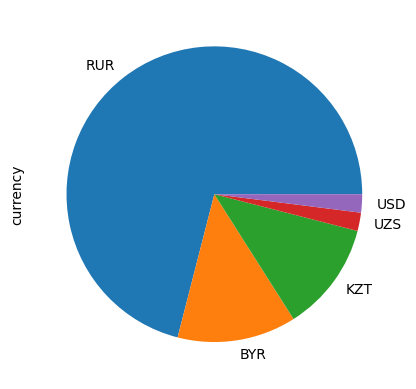

In [44]:
df1.currency.value_counts().plot(kind='pie')

<Axes: >

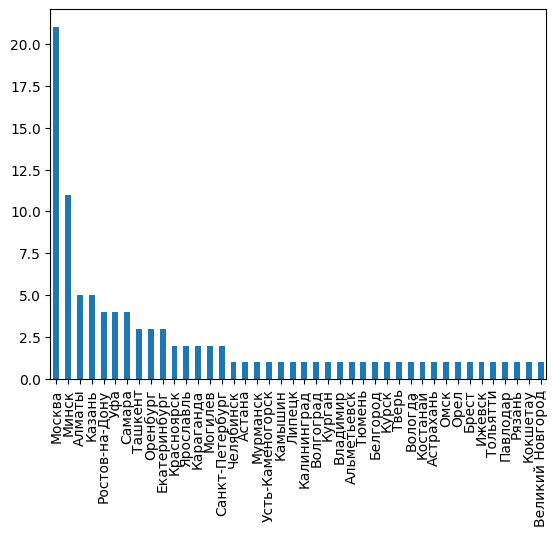

In [45]:
df1.area.value_counts().plot(kind='bar')

<Axes: >

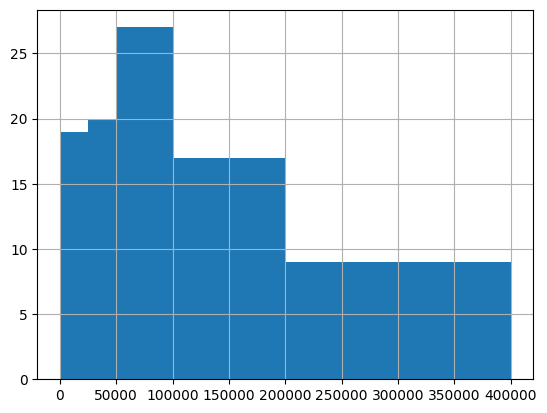

In [47]:
df1['from'].hist(bins=[0,25000,50000,100000,200000,400000])

In [52]:
from pandas.core.ops import methods
df1['to'].fillna(method='bfill').values

array([2.5000e+03, 2.5000e+03, 2.5000e+03, 1.5000e+07, 1.5000e+07,
       1.5000e+07, 1.5000e+07, 4.0000e+05, 1.0000e+04, 7.5000e+04,
       4.0000e+04, 1.7000e+03, 2.5000e+05, 2.5000e+05, 2.5000e+05,
       5.0000e+04, 5.0000e+04, 2.0000e+05, 8.0000e+02, 5.0000e+03,
       5.0000e+03, 5.0000e+03, 1.0000e+06, 7.0000e+04, 3.1000e+05,
       3.1000e+05, 7.0000e+02, 7.0000e+02, 7.0000e+02, 8.0000e+04,
       1.6000e+05, 5.0000e+04, 1.6000e+03, 5.0000e+04, 5.0000e+04,
       5.0000e+04, 1.0000e+03, 2.0000e+03, 5.5000e+04, 5.5000e+04,
       9.0000e+04, 9.0000e+04, 9.0000e+04, 9.0000e+04, 1.3000e+05,
       1.3000e+05, 1.5000e+05, 7.3000e+04, 9.2000e+04, 1.3000e+05,
       1.3000e+05, 1.3000e+05, 1.7300e+05, 2.5000e+05, 6.0000e+04,
       6.0000e+04, 9.0000e+04, 1.0000e+05, 1.0000e+05, 5.5000e+04,
       1.0000e+05, 1.5000e+04, 1.5000e+04, 6.0000e+04, 5.0000e+04,
       1.3000e+05, 5.5000e+04, 5.5000e+04, 5.5000e+04, 5.5000e+04,
       1.2000e+07, 6.5000e+04, 6.5000e+04, 5.0000e+05, 7.0000e

In [56]:
np.vstack((x, np.ones(df.shape[0])))

array([[1.900e+03, 1.700e+03, 1.500e+03, 7.000e+05, 1.600e+04, 1.800e+03,
        1.200e+07, 4.000e+05, 3.000e+03, 5.500e+04, 4.000e+04, 1.300e+03,
        2.000e+05, 5.000e+04, 1.800e+05, 6.000e+04, 5.000e+04, 2.000e+05,
        6.000e+02, 1.000e+05, 1.200e+03, 2.000e+03, 7.000e+05, 5.000e+04,
        1.600e+03, 3.000e+05, 4.000e+04, 4.500e+04, 3.000e+02, 6.000e+04,
        1.300e+05, 4.000e+04, 1.500e+03, 4.370e+04, 4.200e+04, 5.000e+04,
        9.500e+02, 1.800e+03, 3.000e+03, 4.500e+04, 6.700e+04, 5.000e+04,
        5.800e+04, 8.000e+04, 5.000e+04, 1.000e+05, 1.200e+05, 5.000e+04,
        8.200e+04, 1.050e+05, 4.700e+04, 1.000e+05, 1.150e+05, 2.000e+03,
        2.000e+03, 3.000e+04, 7.500e+04, 6.000e+04, 1.000e+05, 5.000e+04,
        5.500e+04, 9.000e+04, 1.500e+04, 5.000e+04, 3.000e+04, 1.300e+05,
        8.000e+04, 2.000e+05, 1.800e+05, 4.500e+04, 6.000e+06, 1.200e+05,
        5.000e+04, 4.000e+05, 3.500e+04, 6.800e+04, 5.000e+04, 4.250e+04,
        3.000e+04, 5.175e+04, 5.000e+0

In [55]:
x = df1['from'].fillna(method='bfill').values
y = df1['to'].fillna(method='bfill').values

linmodel = np.linalg.lstsq(np.vstack((x, np.ones(df.shape[0]))).T,y,rcond=None)

In [57]:
linmodel

(array([1.38550578e+00, 4.63386539e+05]),
 array([6.42013583e+14]),
 2,
 array([1.34990268e+07, 9.79952052e+00]))

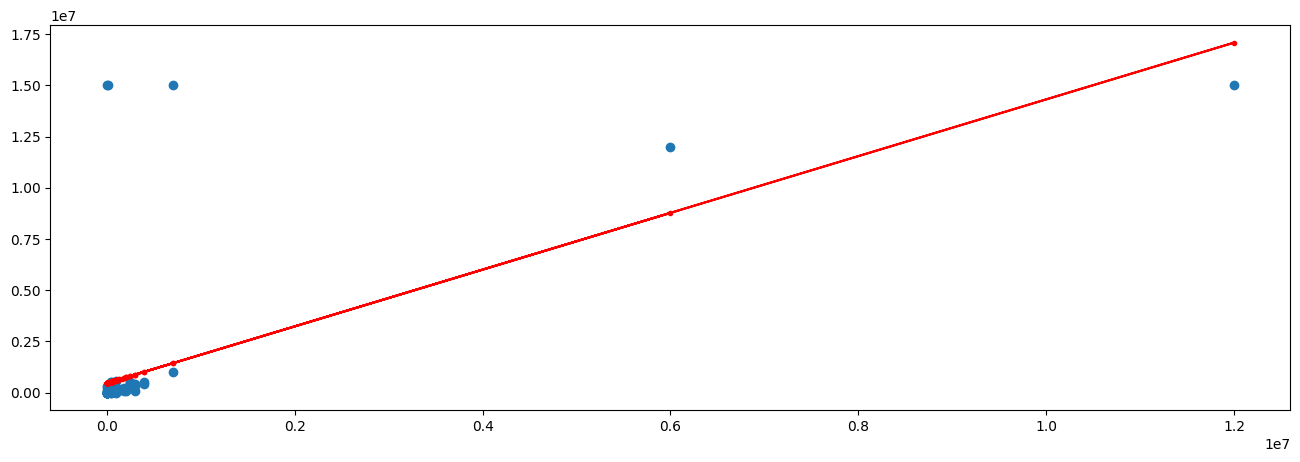

In [61]:
k,b = linmodel[0]
plt.scatter(x,y)
plt.gcf().set_size_inches((16, 5))
plt.plot(x,x*k+b,marker='.',c='red')
plt.show()

<Axes: title={'center': 'to'}, xlabel='currency'>

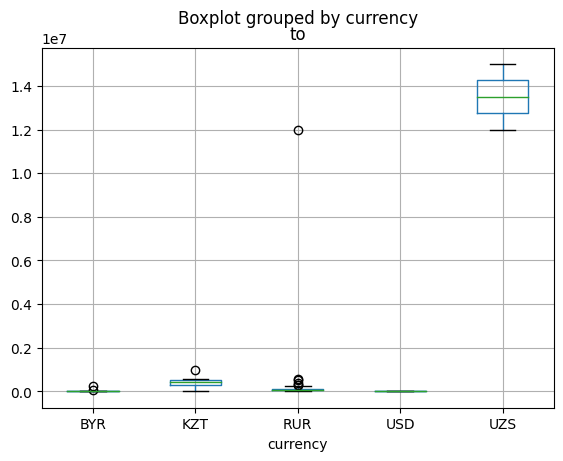

In [64]:
df1.fillna(method='ffill').boxplot(column='to', by='currency')

<Axes: xlabel='0'>

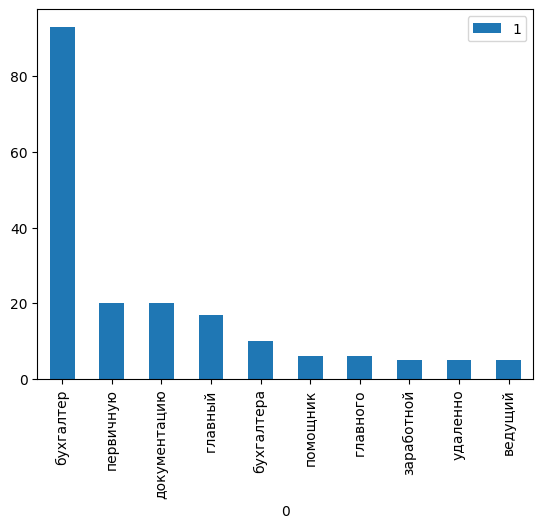

In [70]:
import re
from collections import Counter

pd.DataFrame(Counter(sum(df1.name.apply(lambda x: re.findall('\w{3,}',x.lower())).tolist(),[])).most_common(10)).plot(kind='bar',x=0)